In [19]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("Global YouTube Statistics.csv")

In [3]:
# Display the first few rows of the dataframe to understand its structure
df.head(1)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Population,Unemployment rate (%),Urban_population,Latitude,Longitude,created_date,Gross tertiary education enrollment (%)
0,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,4000000,64700000,8000000,328239523,14.7,270663028,37.09024,-95.712891,20-02-2012,88.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Duplicates found in the 'Youtuber' column:
     rank              Youtuber  subscribers   video views          category  \
3      12                   WWE     96000000  7.742847e+10            Sports   
156   871  Just For Laughs Gags     13300000  7.406629e+09            Comedy   
174    12                   WWE     96000000  7.742847e+10            Sports   
175   871  Just For Laughs Gags     13300000  7.406629e+09            Comedy   
189    41     Infobells - Hindi     53300000  3.051617e+10         Education   
308    41     Infobells - Hindi     53300000  3.051617e+10         Education   
408   787      Supercar Blondie     14100000  5.405563e+09  Autos & Vehicles   
416   873            BanderitaX     13300000  4.129249e+09            Gaming   
426   787      Supercar Blondie     14100000  5.405563e+09  Autos & Vehicles   
427   873            BanderitaX     13300000  4.129249e+09            Gaming   
430    40            Ed Sheeran     53500000  3.036768e+10             Music 

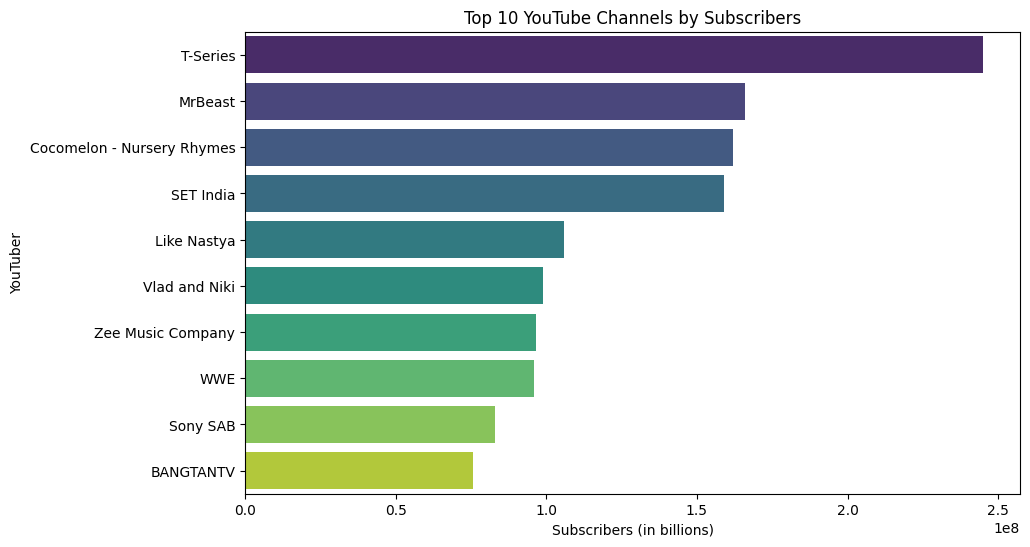

In [5]:
# Check for duplicates in the 'Youtuber' column
duplicate_channels = df[df.duplicated(subset='Youtuber', keep=False)]
if not duplicate_channels.empty:
    print("Duplicates found in the 'Youtuber' column:")
    print(duplicate_channels)

# Drop duplicates to ensure unique YouTube channels
df_unique = df.drop_duplicates(subset='Youtuber')

# Get the top 10 unique YouTube channels based on the number of subscribers
top_10_subscribers = df_unique.nlargest(10, 'subscribers')[
    ['Youtuber', 'subscribers']]

# Plot the top 10 YouTube channels by subscribers
plt.figure(figsize=(10, 6))
sns.barplot(x='subscribers', y='Youtuber',
            data=top_10_subscribers, palette='viridis')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers (in billions)')
plt.ylabel('YouTuber')
plt.show()

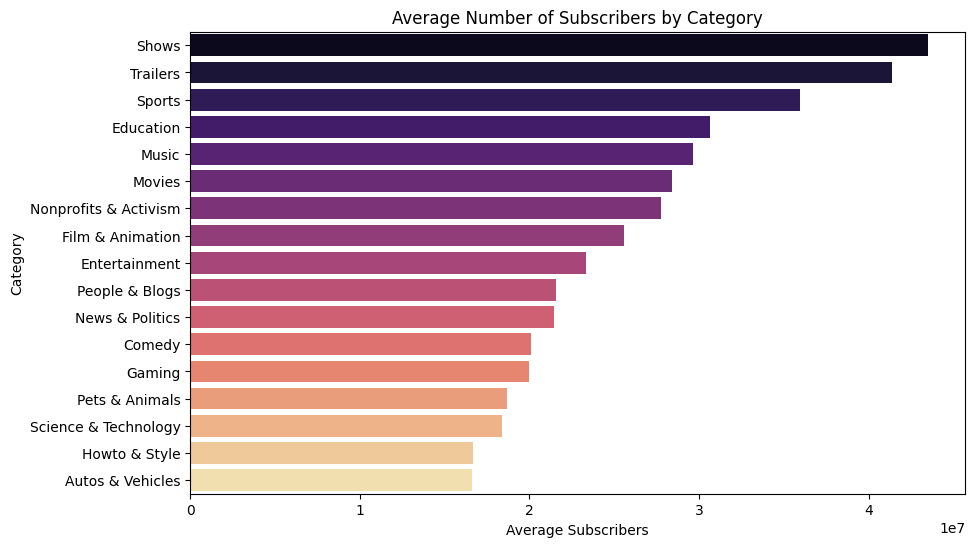

In [6]:
# 2. Which category has the highest average number of subscribers?
category_avg_subs = df.groupby(
    'category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_subs.values,
            y=category_avg_subs.index, palette='magma')
plt.title('Average Number of Subscribers by Category')
plt.xlabel('Average Subscribers')
plt.ylabel('Category')
plt.show()

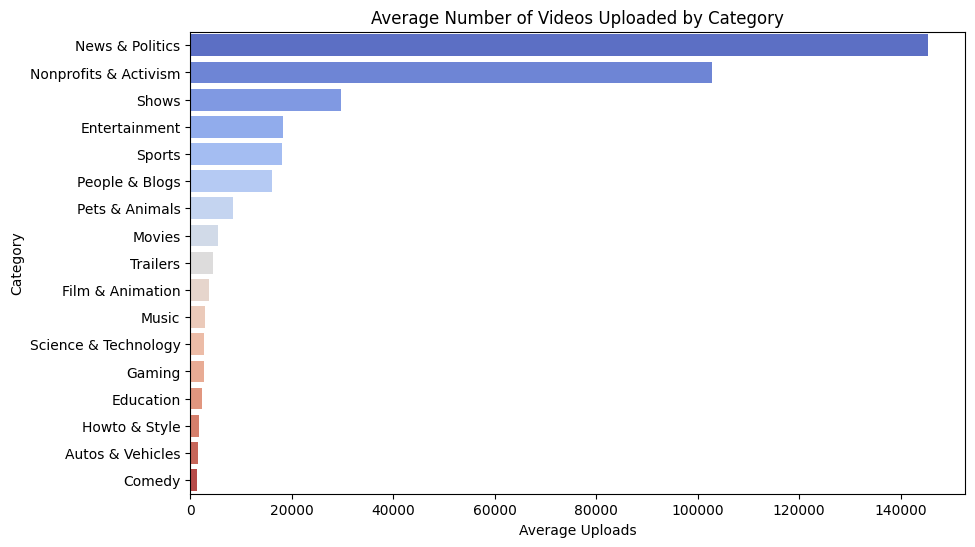

In [7]:
# 3. How many videos, on average, are uploaded by YouTube channels in each category?
category_avg_uploads = df.groupby(
    'category')['uploads'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_uploads.values,
            y=category_avg_uploads.index, palette='coolwarm')
plt.title('Average Number of Videos Uploaded by Category')
plt.xlabel('Average Uploads')
plt.ylabel('Category')
plt.show()

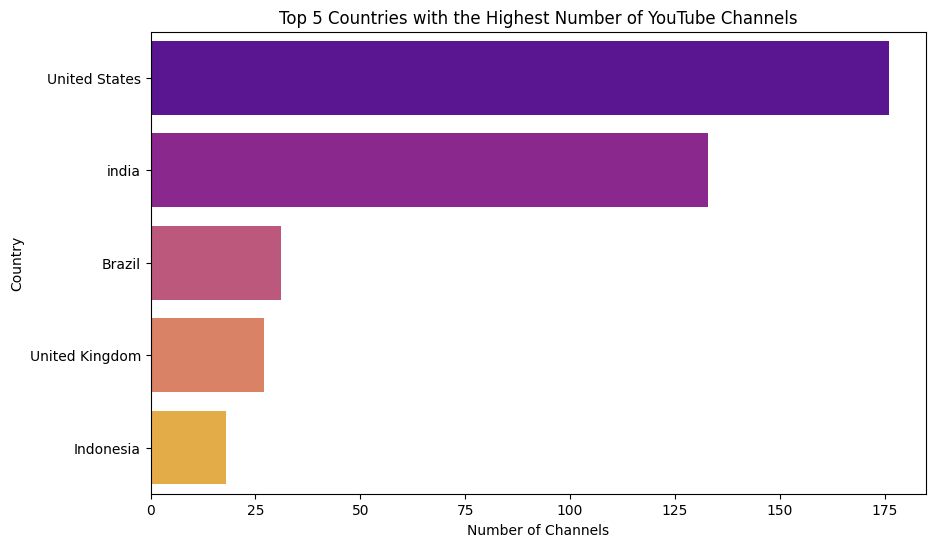

In [8]:
# 4. What are the top 5 countries with the highest number of YouTube channels?
top_5_countries = df['Country'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.values,
            y=top_5_countries.index, palette='plasma')
plt.title('Top 5 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()

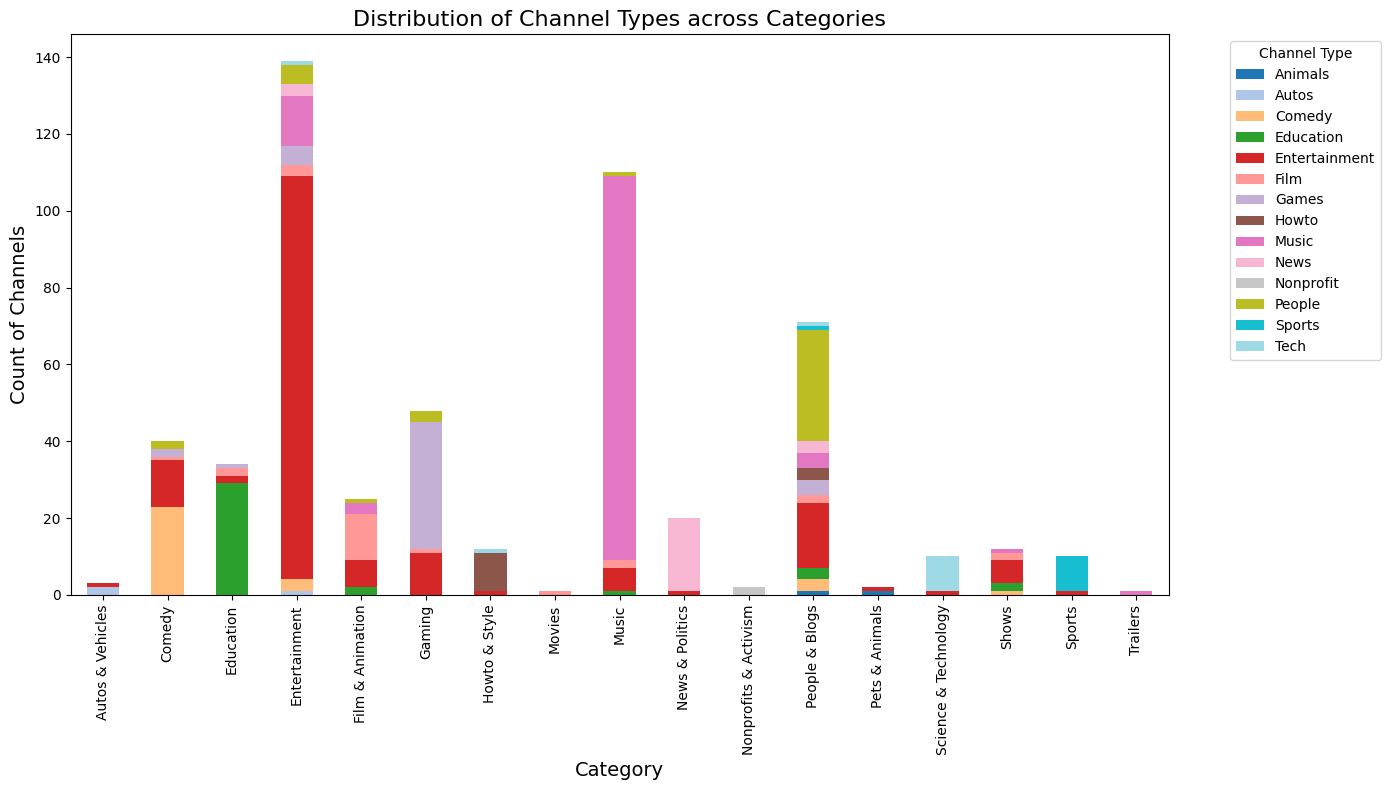

In [9]:
# 5. What is the distribution of channel types across different categories?

# Create a pivot table to get the count of channel types within each category
category_channel_type_counts = df.pivot_table(
    index='category', columns='channel_type', aggfunc='size', fill_value=0)

# Plot a stacked bar plot
category_channel_type_counts.plot(
    kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Improve the title and labels
plt.title('Distribution of Channel Types across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count of Channels', fontsize=14)

# Show the legend outside the plot
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

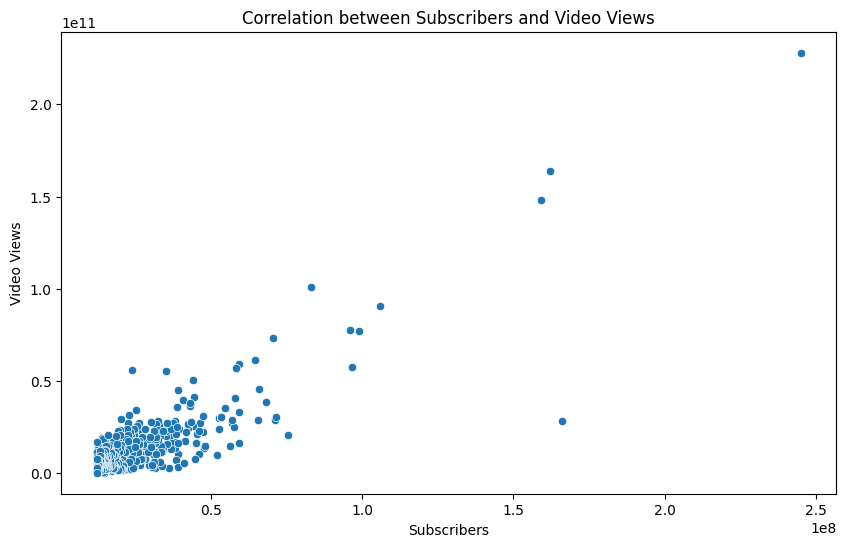

Interpretation:- There is a positive correlation between the number of subscribers and total video views for YouTube channels.
 Channels with more subscribers generally tend to have higher total video views.
 However, there are outliers that have significantly higher subscribers and video views, which could skew the overall correlation.
Pearson correlation coefficient: 0.8582454817358005
Conclusion:- There is a strong positive correlation between the number of subscribers and total video views for YouTube channels.
 This implies that channels with a larger subscriber base tend to accumulate more video views, which is expected as more subscribers likely contribute to higher view counts.


In [10]:
# 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=df)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

print("Interpretation:- There is a positive correlation between the number of subscribers and total video views for YouTube channels.\n Channels with more subscribers generally tend to have higher total video views.\n However, there are outliers that have significantly higher subscribers and video views, which could skew the overall correlation.")
# Calculate the Pearson correlation coefficient
correlation = df['subscribers'].corr(df['video views'])
print(f'Pearson correlation coefficient: {correlation}')

print("Conclusion:- There is a strong positive correlation between the number of subscribers and total video views for YouTube channels.\n This implies that channels with a larger subscriber base tend to accumulate more video views, which is expected as more subscribers likely contribute to higher view counts.")

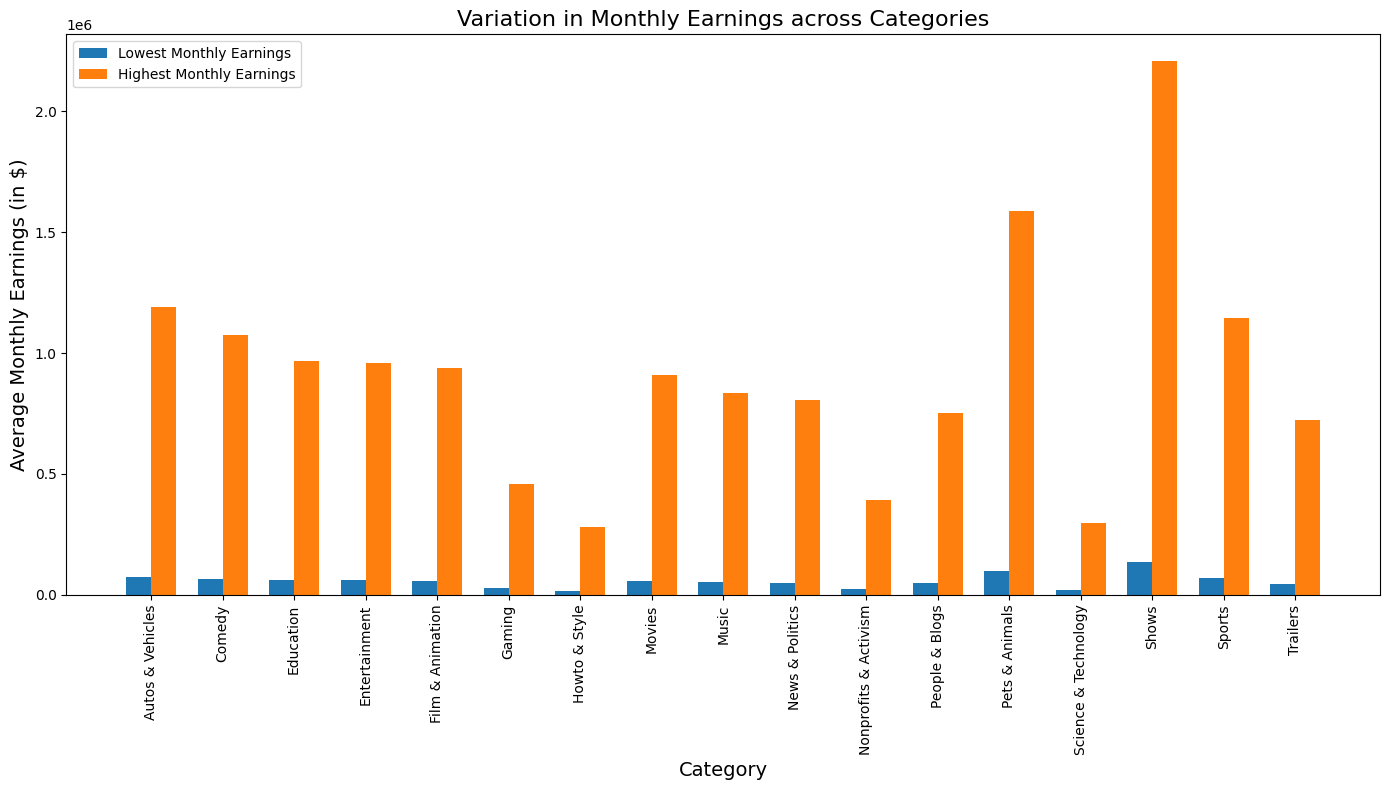

In [11]:
# 7. How do the monthly earnings vary throughout different categories?

# Calculate the average lowest and highest monthly earnings for each category
category_earnings = df.groupby('category')[
    ['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(category_earnings))

# Plot lowest monthly earnings
plt.bar(index, category_earnings['lowest_monthly_earnings'],
        bar_width, label='Lowest Monthly Earnings')

# Plot highest monthly earnings
plt.bar([i + bar_width for i in index], category_earnings['highest_monthly_earnings'],
        bar_width, label='Highest Monthly Earnings')

# Improve the title and labels
plt.title('Variation in Monthly Earnings across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Monthly Earnings (in $)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index],
            category_earnings['category'], rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

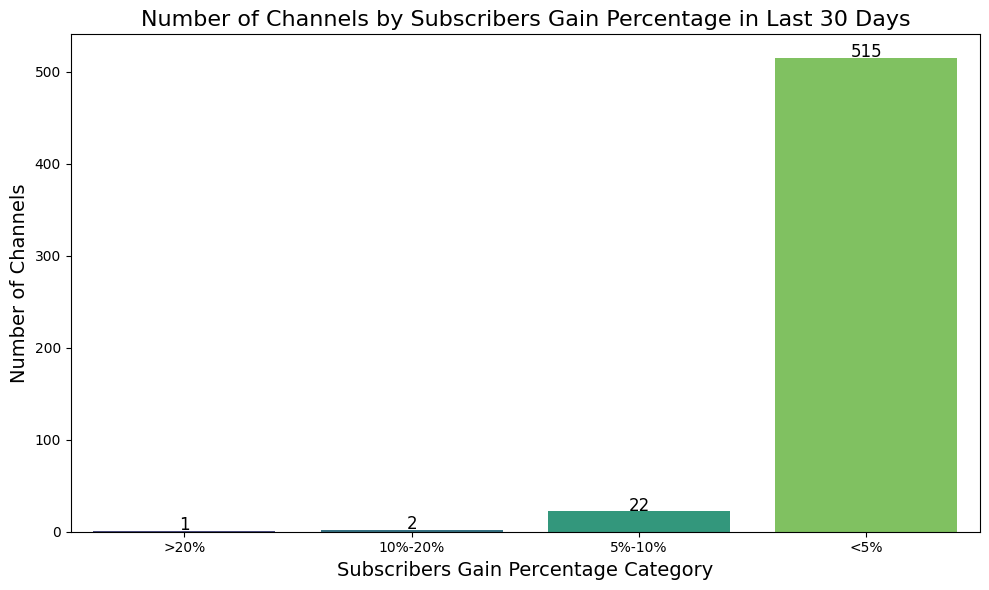


Channels with >20% gain:
['DaFuq!?Boom!']

Channels with 10%-20% gain:
['Jess No Limit', 'Go Ami Go!']

Channels with 5%-10% gain:
['LeoNata Family', 'Topper Guild', 'Prime Video India', 'ViralHog', '_vector_', 'Heroindori', 'Ishaan Ali 11', 'Priyal Kukreja', 'jaanvi patel', 'Pokï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½', 'Ricis Official', 'TheDonato', 'PANDA BOI', 'tuzelity SHUFFLE', 'Ami Rodriguez', 'dednahype', 'Willie Salim', 'Younes Zarou', 'ILYA BORZOV', 'ISSEI / ï¿½ï¿½ï¿½ï¿½', "GH'S", 'Natan por Aï¿']

Channels with <5% gain:
['MrBeast', 'Cocomelon - Nursery Rhymes', 'Vlad and Niki', 'WWE', "Pinkfong Baby Shark - Kids' Songs & Stories", 'Dude Perfect', 'Movieclips', 'EminemMusic', 'Marshmello', 'Taylor Swift', 'Ariana Grande', 'BillionSurpriseToys  - Nursery Rhymes & Cartoons', 'Billie Eilish', 'SonyMusicIndiaVEVO', 'Katy Perry', 'Masha and The Bear', 'Little Baby Bum - Nursery Rhymes & Kids Songs', 'XXXTENTACION', 'TEDx Talks', 'One Direction', 'Daddy Yankee', 'Like Nastya ESP', 'Bruno Mars

In [12]:
# 8. What is the overall trend in subscribers gained in the last 30 days across all channels?

# Calculate the percentage of subscribers gained in the last 30 days
df['subscribers_gain_percentage'] = (
    df['subscribers_for_last_30_days'] / df['subscribers']) * 100

# Categorize the channels based on the given thresholds
conditions = [
    (df['subscribers_gain_percentage'] > 20),
    (df['subscribers_gain_percentage'] <= 20) & (
        df['subscribers_gain_percentage'] > 10),
    (df['subscribers_gain_percentage'] <= 10) & (
        df['subscribers_gain_percentage'] > 5),
    (df['subscribers_gain_percentage'] <= 5)
]
choices = ['>20%', '10%-20%', '5%-10%', '<5%']
df['gain_category'] = np.select(conditions, choices, default='Other')

# Count the number of channels in each category
category_counts = df['gain_category'].value_counts().reindex(choices)

# Plot the results in a bar graph
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=category_counts.index,
                        y=category_counts.values, palette='viridis')

# Set the title and labels
plt.title(
    'Number of Channels by Subscribers Gain Percentage in Last 30 Days', fontsize=16)
plt.xlabel('Subscribers Gain Percentage Category', fontsize=14)
plt.ylabel('Number of Channels', fontsize=14)

# Add counts on top of each bar
for i, count in enumerate(category_counts.values):
    bar_plot.text(i, count + 1, str(count), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the channel names for each category
for category in choices:
    print(f"\nChannels with {category} gain:")
    channels = df[df['gain_category'] == category]['Youtuber']
    print(channels.to_list())

# Calculate the maximum percentage gain achieved
max_gain = df['subscribers_gain_percentage'].max()
max_gain_channel = df.loc[df['subscribers_gain_percentage'].idxmax()
                          ]['Youtuber']
print(f"\nMaximum percentage gain achieved: {max_gain}% by {max_gain_channel}")

Channels with outliers only in lowest yearly earnings:
['Taylor Swift']

Channels with outliers only in highest yearly earnings:
[]


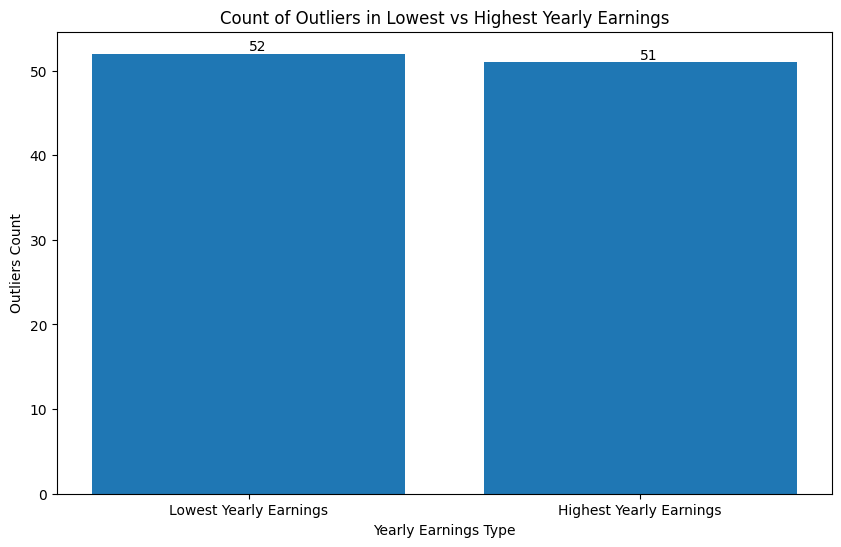

Yes, there are outliers in terms of yearly earnings from YouTube channels. 
 After analyzing the dataset, we found that there are channels with yearly earnings that are significantly higher or lower than the majority of channels, indicating outliers in both the lowest and highest yearly earnings categories. 
These outliers can have a notable impact on the overall distribution and statistical analysis of yearly earnings among YouTube channels.


In [14]:
# 9. Are there any outliers in terms of yearly earnings from YouTube channels?

Q1_lowest = df['lowest_yearly_earnings'].quantile(0.25)
Q3_lowest = df['lowest_yearly_earnings'].quantile(0.75)
IQR_lowest = Q3_lowest - Q1_lowest

Q1_highest = df['highest_yearly_earnings'].quantile(0.25)
Q3_highest = df['highest_yearly_earnings'].quantile(0.75)
IQR_highest = Q3_highest - Q1_highest

# Define the outlier thresholds
lower_bound_lowest = Q1_lowest - 1.5 * IQR_lowest
upper_bound_lowest = Q3_lowest + 1.5 * IQR_lowest

lower_bound_highest = Q1_highest - 1.5 * IQR_highest
upper_bound_highest = Q3_highest + 1.5 * IQR_highest

# Identify outliers for lowest and highest yearly earnings
outliers_lowest = df[(df['lowest_yearly_earnings'] < lower_bound_lowest) | (
    df['lowest_yearly_earnings'] > upper_bound_lowest)]
outliers_highest = df[(df['highest_yearly_earnings'] < lower_bound_highest) | (
    df['highest_yearly_earnings'] > upper_bound_highest)]

# Find channels unique to each category
unique_outliers_lowest = outliers_lowest[~outliers_lowest['Youtuber'].isin(
    outliers_highest['Youtuber'])]
unique_outliers_highest = outliers_highest[~outliers_highest['Youtuber'].isin(
    outliers_lowest['Youtuber'])]

# Print channels unique to each category
print("Channels with outliers only in lowest yearly earnings:")
print(unique_outliers_lowest['Youtuber'].values)

print("\nChannels with outliers only in highest yearly earnings:")
print(unique_outliers_highest['Youtuber'].values)

# Plot outliers count in a bar graph with count annotations
plt.figure(figsize=(10, 6))
outliers_count = [len(outliers_lowest), len(outliers_highest)]
labels = ['Lowest Yearly Earnings', 'Highest Yearly Earnings']
bars = plt.bar(labels, outliers_count)
plt.xlabel('Yearly Earnings Type')
plt.ylabel('Outliers Count')
plt.title('Count of Outliers in Lowest vs Highest Yearly Earnings')

# Add count annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval, round(yval, 2), va='bottom')

plt.show()

print("Yes, there are outliers in terms of yearly earnings from YouTube channels. \n After analyzing the dataset, we found that there are channels with yearly earnings that are significantly higher or lower than the majority of channels, indicating outliers in both the lowest and highest yearly earnings categories. \nThese outliers can have a notable impact on the overall distribution and statistical analysis of yearly earnings among YouTube channels.")

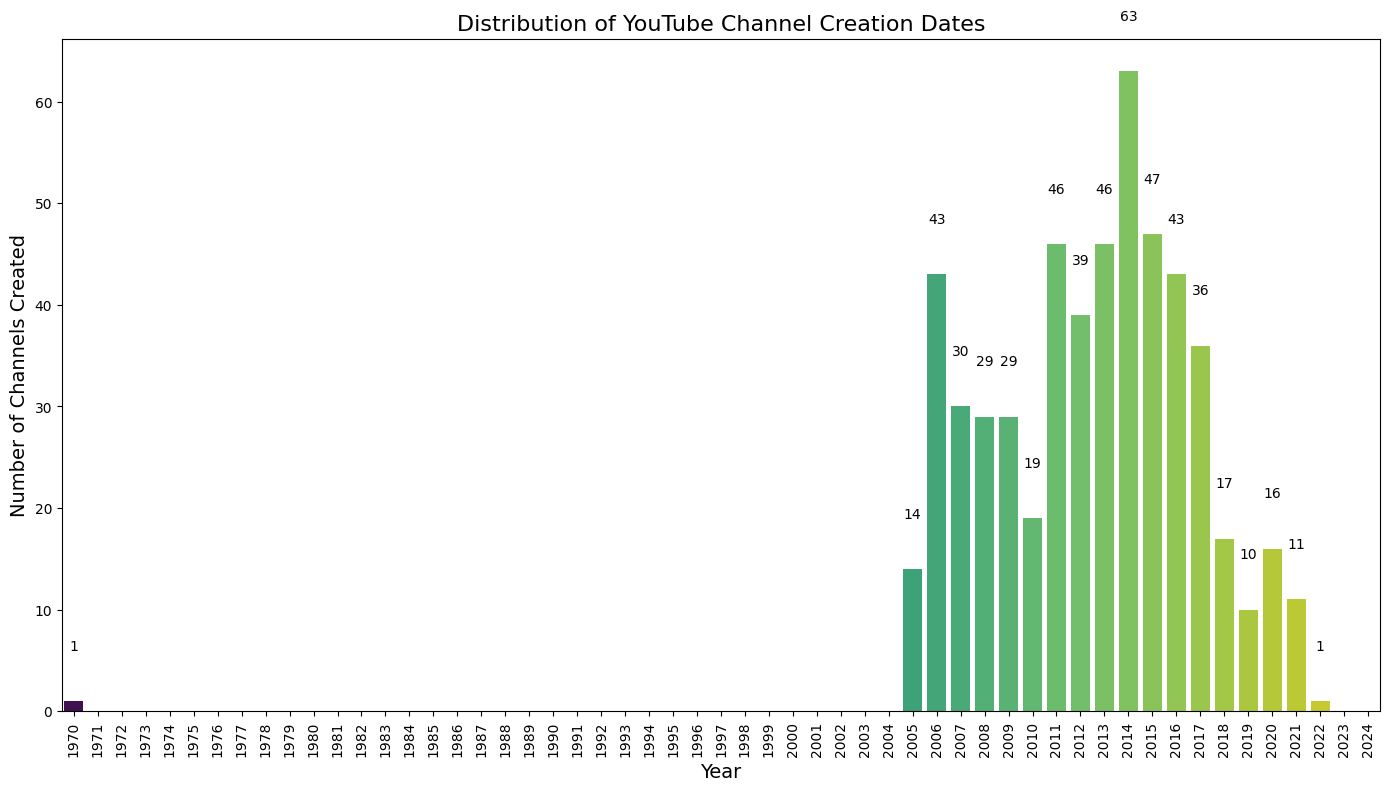

In [17]:
# 10. What is the distribution of channel creation dates? Is there any trend over time?

# Convert 'created_date' to datetime
df['created_date'] = pd.to_datetime(df['created_date'], format='%d-%m-%Y')

# Extract the year from 'created_date'
df['created_year'] = df['created_date'].dt.year

# Create a range of years from the earliest year to 2024
year_range = list(range(df['created_year'].min(), 2025))

# Count the number of channels created each year
channel_counts_by_year = df['created_year'].value_counts().reindex(
    year_range, fill_value=0)

# Plot the distribution of channel creation dates
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x=channel_counts_by_year.index,
                        y=channel_counts_by_year.values, palette='viridis')

# Set the title and labels
plt.title('Distribution of YouTube Channel Creation Dates', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Channels Created', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add counts on top of each bar
for i, count in enumerate(channel_counts_by_year.values):
    if count != 0 :
        bar_plot.text(i, count + 5, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

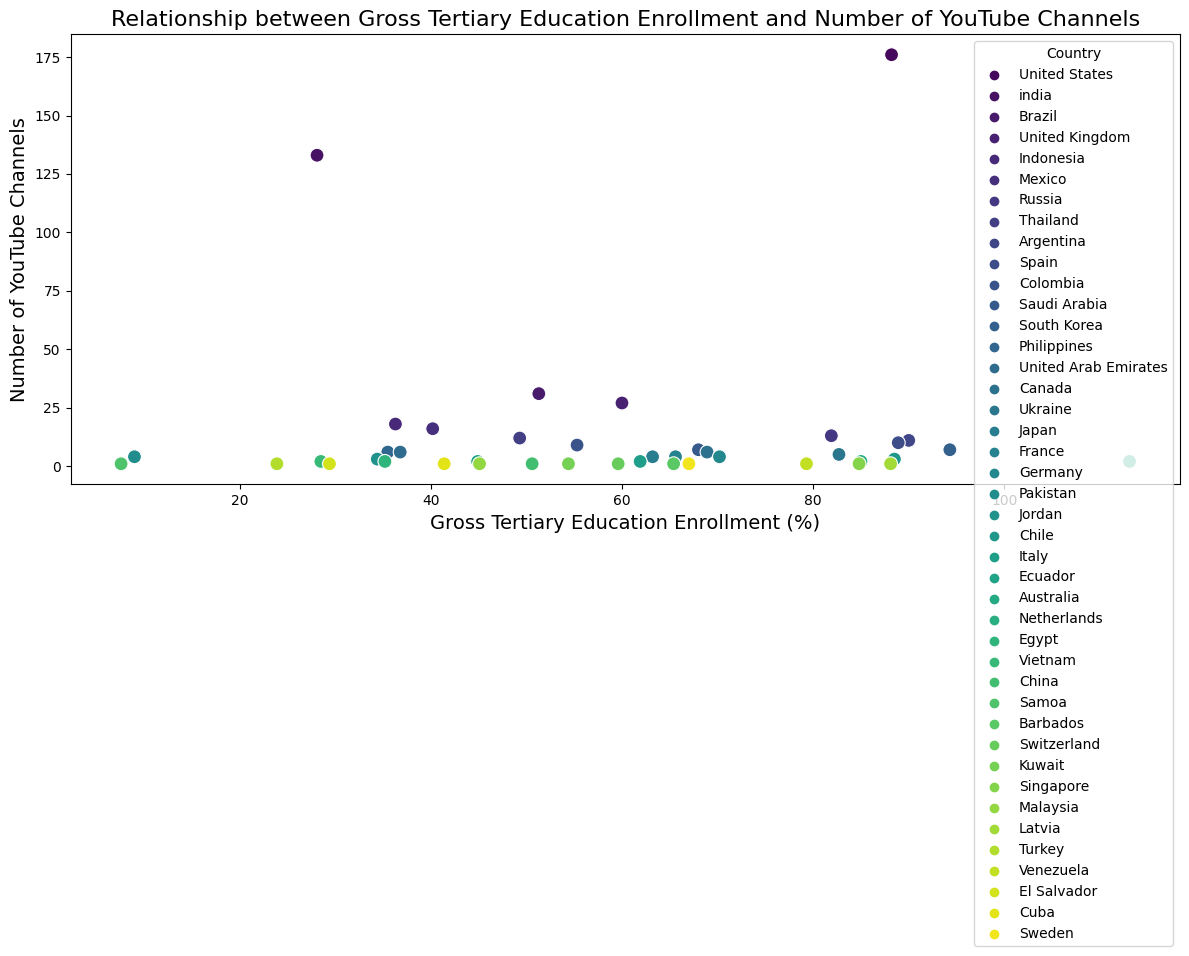

Pearson correlation coefficient: 0.0389678619785874
P-value: 0.8064469295630986


In [20]:
# 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

# Calculate the number of YouTube channels for each country
channels_per_country = df['Country'].value_counts().reset_index()
channels_per_country.columns = ['Country', 'num_channels']

# Aggregate the gross tertiary education enrollment for each country
education_enrollment_per_country = df.groupby(
    'Country')['Gross tertiary education enrollment (%)'].mean().reset_index()

# Merge the two dataframes on 'Country'
merged_df = pd.merge(channels_per_country,
                     education_enrollment_per_country, on='Country')

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Gross tertiary education enrollment (%)',
                y='num_channels', hue='Country', palette='viridis', s=100)

# Set the title and labels
plt.title('Relationship between Gross Tertiary Education Enrollment and Number of YouTube Channels', fontsize=16)
plt.xlabel('Gross Tertiary Education Enrollment (%)', fontsize=14)
plt.ylabel('Number of YouTube Channels', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(
    merged_df['Gross tertiary education enrollment (%)'], merged_df['num_channels'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

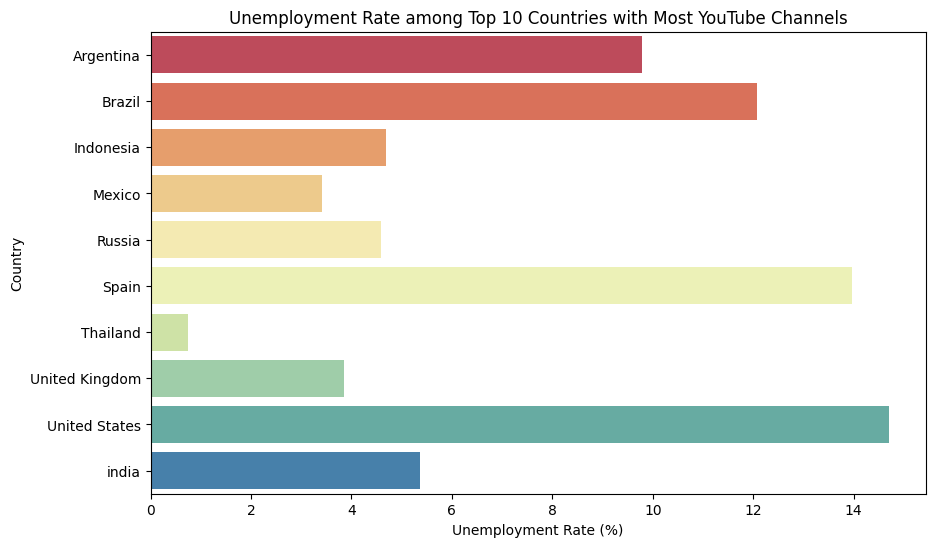

In [ ]:
# 12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?
top_10_countries = df['Country'].value_counts().nlargest(10).index
unemployment_top_10 = df[df['Country'].isin(top_10_countries)].groupby('Country')[
    'Unemployment rate (%)'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=unemployment_top_10.values,
            y=unemployment_top_10.index, palette='Spectral')
plt.title('Unemployment Rate among Top 10 Countries with Most YouTube Channels')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.show()

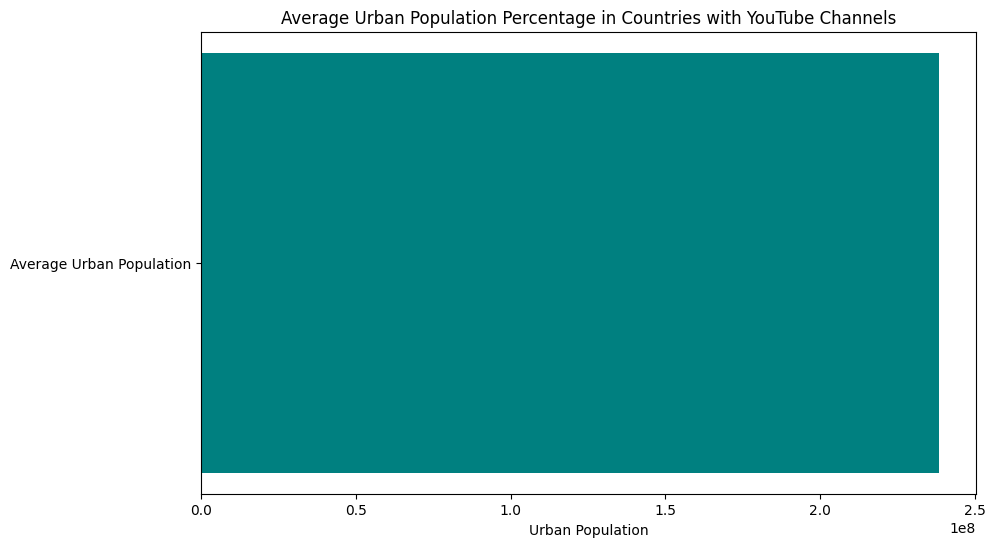

In [ ]:
# 13. What is the average urban population percentage in countries with YouTube channels?
avg_urban_population = df['Urban_population'].mean()
plt.figure(figsize=(10, 6))
plt.barh(['Average Urban Population'], [avg_urban_population], color='teal')
plt.title('Average Urban Population Percentage in Countries with YouTube Channels')
plt.xlabel('Urban Population')
plt.show()

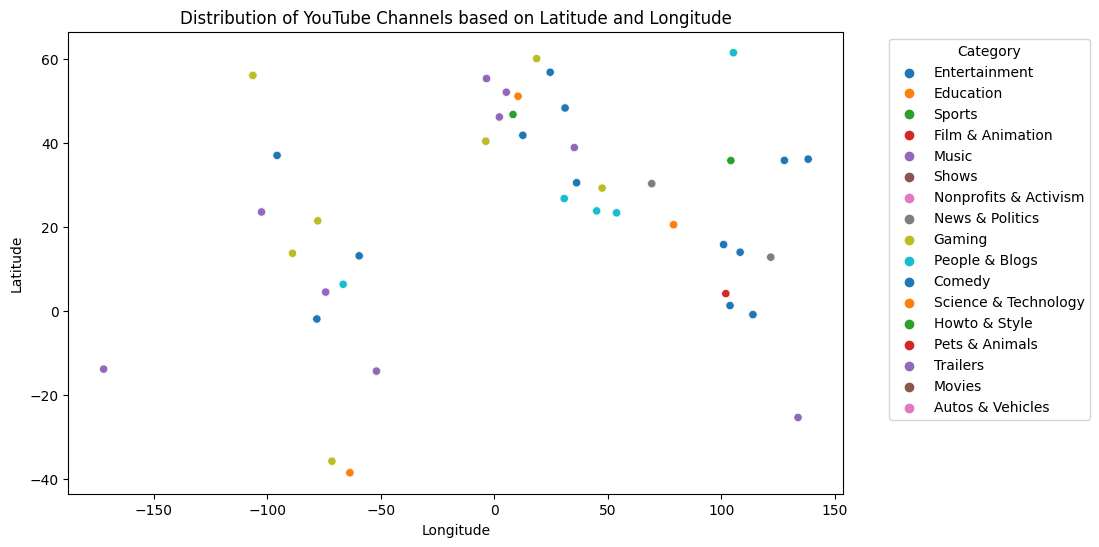

In [ ]:
# 14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude',
                hue='category', data=df, palette='tab10')
plt.title('Distribution of YouTube Channels based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

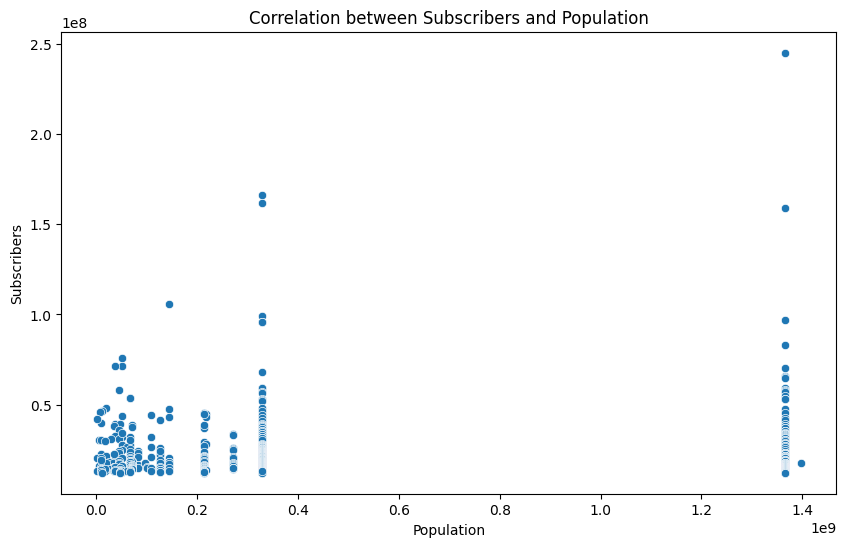

In [ ]:
# 15. What is the correlation between the number of subscribers and the population of a country?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='subscribers', data=df)
plt.title('Correlation between Subscribers and Population')
plt.xlabel('Population')
plt.ylabel('Subscribers')
plt.show()

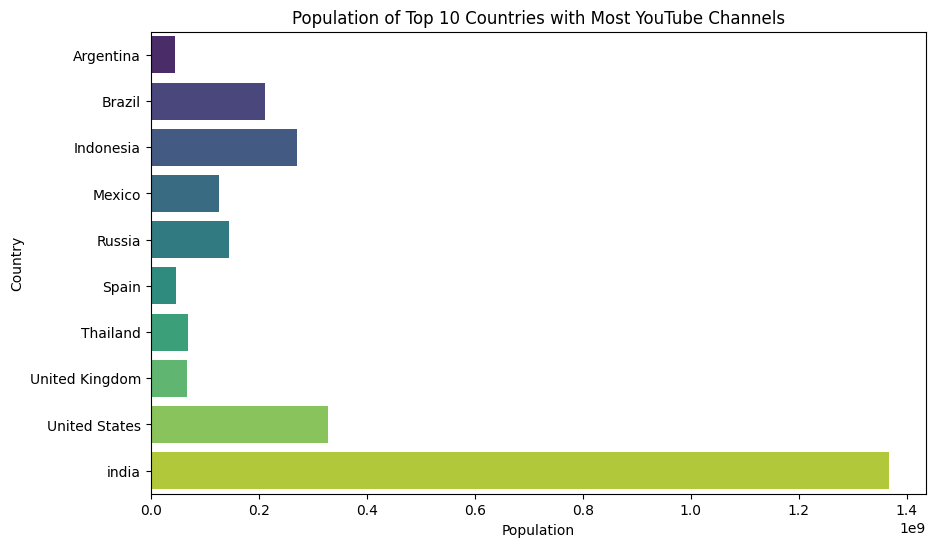

In [ ]:
# 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?
population_top_10_countries = df[df['Country'].isin(
    top_10_countries)].groupby('Country')['Population'].first()
plt.figure(figsize=(10, 6))
sns.barplot(x=population_top_10_countries.values,
            y=population_top_10_countries.index, palette='viridis')
plt.title('Population of Top 10 Countries with Most YouTube Channels')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

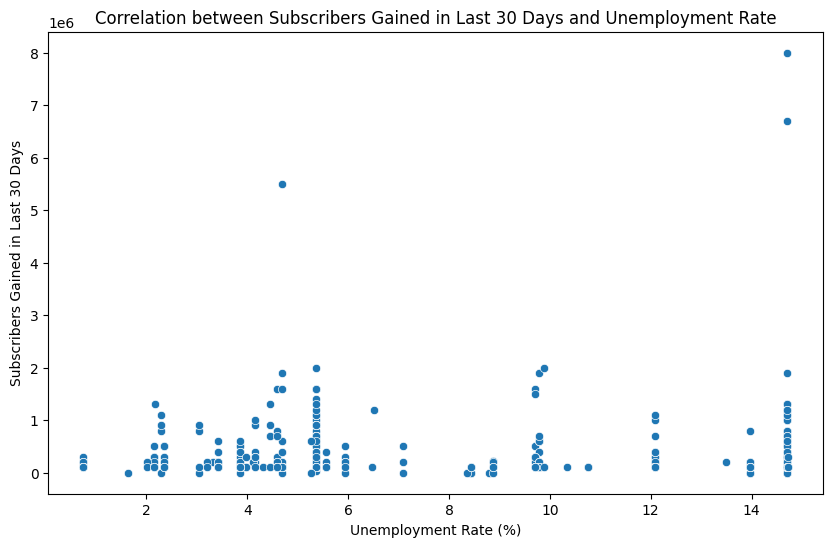

In [ ]:
# 17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment rate (%)',
                y='subscribers_for_last_30_days', data=df)
plt.title(
    'Correlation between Subscribers Gained in Last 30 Days and Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.show()

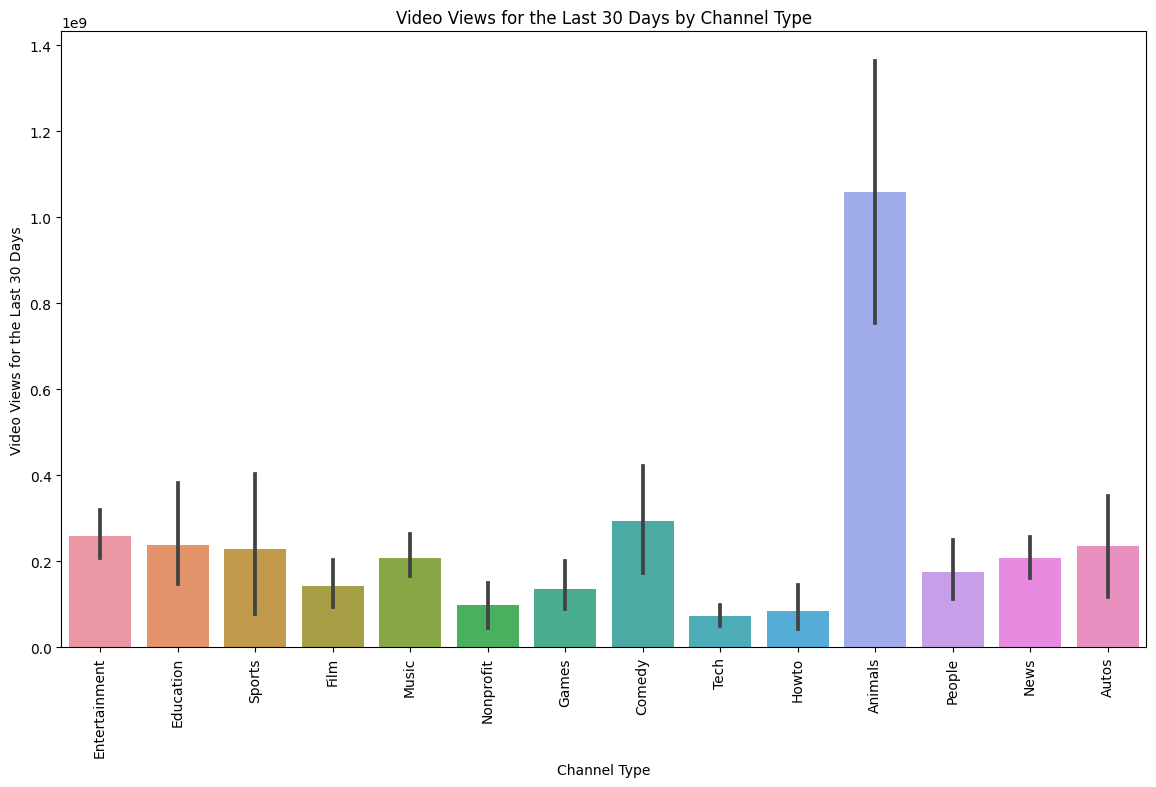

In [ ]:
# 18. How does the distribution of video views for the last 30 days vary across different channel types?
plt.figure(figsize=(14, 8))
sns.barplot(x='channel_type', y='video_views_for_the_last_30_days', data=df)
plt.title('Video Views for the Last 30 Days by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views for the Last 30 Days')
plt.xticks(rotation=90)
plt.show()

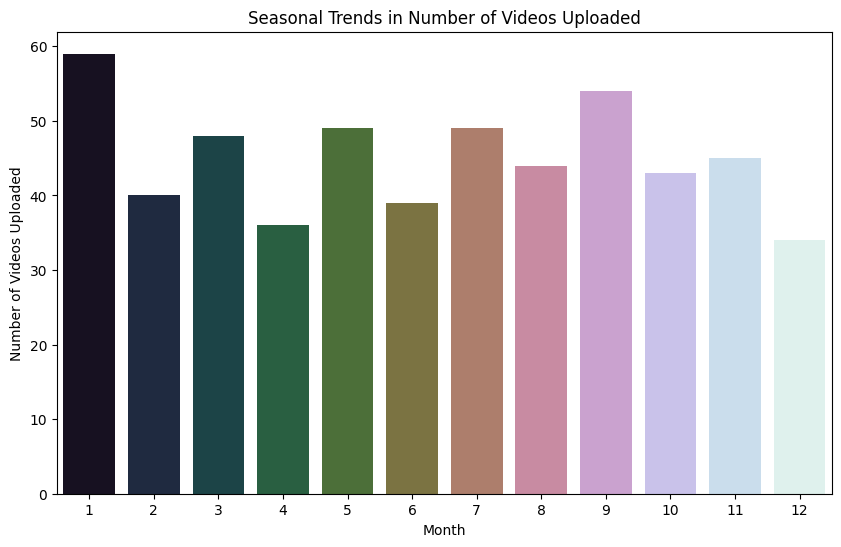

In [ ]:
# 19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?
df['upload_month'] = df['created_date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='upload_month', data=df, palette='cubehelix')
plt.title('Seasonal Trends in Number of Videos Uploaded')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.show()

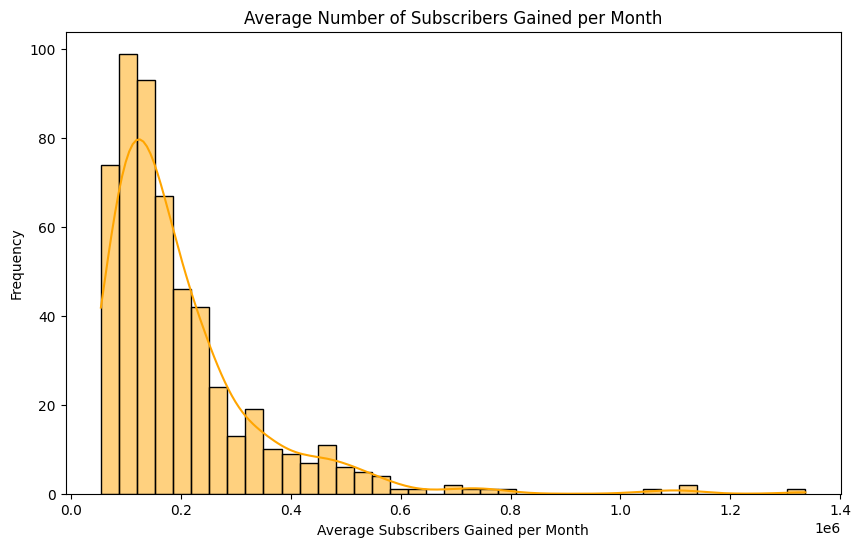

In [ ]:
# 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?
df['months_since_creation'] = (
    (pd.to_datetime('today') - df['created_date']).dt.days // 30)
df['avg_subs_per_month'] = df['subscribers'] / df['months_since_creation']
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_subs_per_month'], kde=True, color='orange')
plt.title('Average Number of Subscribers Gained per Month')
plt.xlabel('Average Subscribers Gained per Month')
plt.ylabel('Frequency')
plt.show()